# TME2 - SPLEX
**Podlejski - Perrin**

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

path = "../TME1/"


## Preliminaries



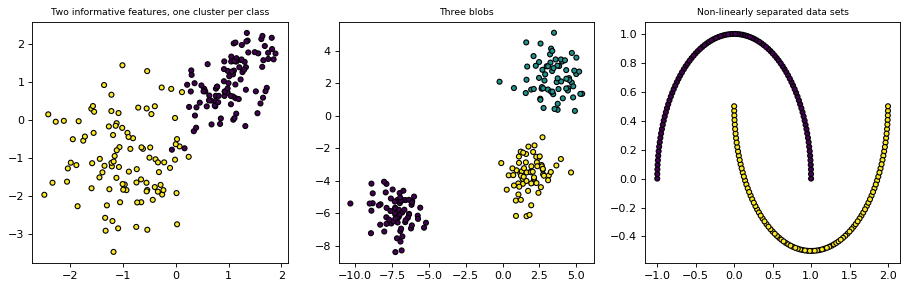

In [17]:
# First simulated data set
plt.figure(figsize=(14,4), dpi=80)
plt.subplot(131)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=20, edgecolor='k')


# Second simulated data set
plt.subplot(132)
plt.title("Three blobs", fontsize='small')
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=20, edgecolor='k')


# Third simulated data set
plt.subplot(133)
plt.title("Non-linearly separated data sets", fontsize='small')
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=20, edgecolor='k')
plt.show()

## K-MEANS

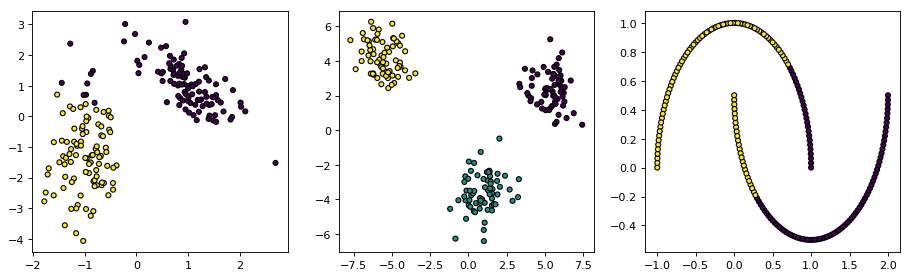

In [16]:
km2 = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1)
km3 = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1)

plt.figure(figsize=(14,4), dpi=80)

plt.subplot(131)
km2.fit(X1)
plt.scatter(X1[:, 0], X1[:, 1], s=20, c=km2.labels_,edgecolor='k')


plt.subplot(132)
km3.fit(X2)
plt.scatter(X2[:, 0], X2[:, 1], s=20, c=km3.labels_, edgecolor='k')

plt.subplot(133)
km2.fit(X3)
plt.scatter(X3[:, 0], X3[:, 1], s=20, c=km2.labels_, edgecolor='k')
plt.show()

## HIERARCHICAL CLUSTERING

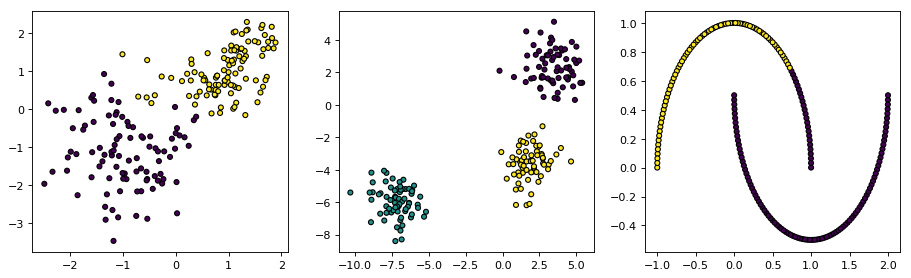

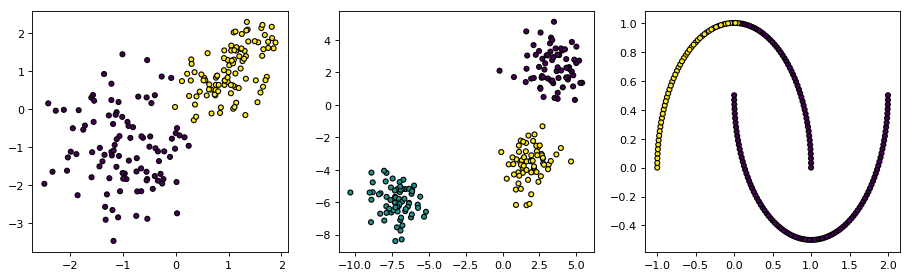

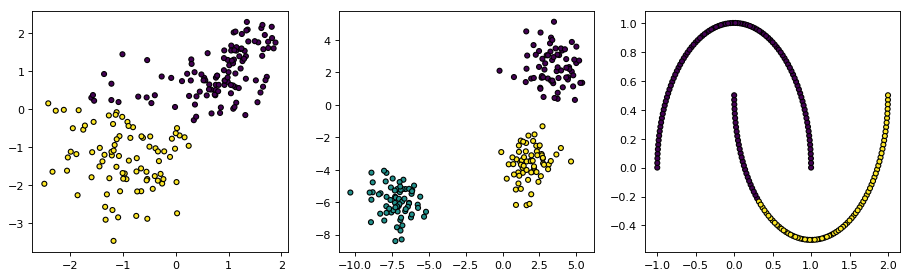

In [19]:
d = {}
for linkage in ('ward', 'average', 'complete'):
    plt.figure(figsize=(14,4), dpi=80)

    d[linkage] = {}
    d[linkage][2] = AgglomerativeClustering(linkage=linkage, n_clusters=2)
    d[linkage][3] = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    
    plt.subplot(131)
    d[linkage][2] .fit(X1)
    plt.scatter(X1[:, 0], X1[:, 1], s=20, c= d[linkage][2].labels_, edgecolor='k')

    plt.subplot(132)
    d[linkage][3] .fit(X2)
    plt.scatter(X2[:, 0], X2[:, 1], s=20, c= d[linkage][3].labels_, edgecolor='k')
    
    plt.subplot(133)
    d[linkage][2].fit(X3)
    plt.scatter(X3[:, 0], X3[:, 1], s=20, c= d[linkage][2].labels_, edgecolor='k')
    plt.show()

## SPECTRAL CLUSTERING

/home/witold/.local/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


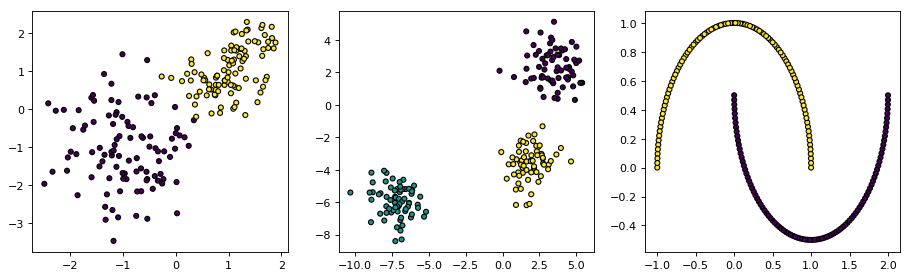

In [20]:

plt.figure(figsize=(14,4), dpi=80)

spectral2 = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack',affinity="nearest_neighbors")
spectral3 = cluster.SpectralClustering(n_clusters=3, eigen_solver='arpack',affinity="nearest_neighbors")

plt.subplot(131)
spectral2.fit(X1)
plt.scatter(X1[:, 0], X1[:, 1], s=20, c=spectral2.labels_, edgecolor='k')

plt.subplot(132)
spectral3.fit(X2)
plt.scatter(X2[:, 0], X2[:, 1], s=20, c=spectral3.labels_, edgecolor='k')

plt.subplot(133)
spectral2.fit(X3)
plt.scatter(X3[:, 0], X3[:, 1], s=20, c=spectral2.labels_, edgecolor='k')
plt.show()

## ANALYSIS OF THE RESULTS OF CLUSTERING

In [32]:
score = [[[],[],[],[],[],[]],[[],[],[],[],[],[]],[[],[],[],[],[],[]]]

for j in [[km2,'kmeans'],[d['ward'][2],"ward"],[d['average'][2],"average"],[d['complete'][2],"complete"],[spectral2,"spectral"]]:
    

    
    clust = j[0]
    clust.fit(X1)
    
    score[0][0].append(j[1])

    
    score[0][1].append(metrics.homogeneity_score(Y1,clust.labels_))
    score[0][2].append(metrics.completeness_score(Y1,clust.labels_))
    score[0][3].append(metrics.v_measure_score(Y1,clust.labels_))
    score[0][4].append(metrics.adjusted_rand_score(Y1,clust.labels_))
    score[0][5].append(metrics.silhouette_score(X1,clust.labels_))
        
    clust.fit(X3)
    
    score[2][0].append(j[1])
    score[2][1].append(metrics.homogeneity_score(Y3,clust.labels_))
    score[2][2].append(metrics.completeness_score(Y3,clust.labels_))
    score[2][3].append(metrics.v_measure_score(Y3,clust.labels_))
    score[2][4].append(metrics.adjusted_rand_score(Y3,clust.labels_))
    score[2][5].append(metrics.silhouette_score(X3,clust.labels_))



for j in [[km3,'kmeans'],[d['ward'][3],"ward"],[d['average'][3],"average"],[d['complete'][3],"complete"],[spectral3,"spectral"]]:
    clust = j[0]
    clust.fit(X2)
    
    score[1][0].append(j[1])
    score[1][1].append(metrics.homogeneity_score(Y2,clust.labels_))
    score[1][2].append(metrics.completeness_score(Y2,clust.labels_))
    score[1][3].append(metrics.v_measure_score(Y2,clust.labels_))
    score[1][4].append(metrics.adjusted_rand_score(Y2,clust.labels_))
    score[1][5].append(metrics.silhouette_score(X2,clust.labels_))
print("X1")
print
df1 = pd.DataFrame({"methode":score[0][0],
                    "homogeneity":score[0][1],
                    "completness":score[0][2],
                    "v_measure":score[0][3],
                    "adjusted_rank":score[0][4],
                    "silhouette":score[0][5]})
print(df1.to_string(index=False,columns=['methode',"homogeneity","completness","v_measure","adjusted_rank","silhouette"], justify='center'))
print
print("X2")
print
df2 = pd.DataFrame({"methode":score[1][0],
                    "homogeneity":score[1][1],
                    "completness":score[1][2],
                    "v_measure":score[1][3],
                    "adjusted_rank":score[1][4],
                    "silhouette":score[1][5]})
print(df2.to_string(index=False,columns=['methode',"homogeneity","completness","v_measure","adjusted_rank","silhouette"], justify='center'))
print
print("X3")
print
df3 = pd.DataFrame({"methode":score[2][0],
                    "homogeneity":score[2][1],
                    "completness":score[2][2],
                    "v_measure":score[2][3],
                    "adjusted_rank":score[2][4],
                    "silhouette":score[2][5]})
print(df3.to_string(index=False,columns=['methode',"homogeneity","completness","v_measure","adjusted_rank","silhouette"], justify='center'))

 methode   homogeneity  completness  v_measure  adjusted_rank  silhouette
   kmeans   0.744514     0.745859    0.745186     0.827234      0.585494 
     ward   0.658815     0.660006    0.659410     0.755675      0.575453 
  average   0.858559     0.858559    0.858559     0.921204      0.569397 
 complete   0.584136     0.593810    0.588933     0.654402      0.559693 
 spectral   0.805608     0.805608    0.805608     0.883012      0.576737 

 methode   homogeneity  completness  v_measure  adjusted_rank  silhouette
   kmeans      1.0          1.0         1.0          1.0         0.74349 
     ward      1.0          1.0         1.0          1.0         0.74349 
  average      1.0          1.0         1.0          1.0         0.74349 
 complete      1.0          1.0         1.0          1.0         0.74349 
 spectral      1.0          1.0         1.0          1.0         0.74349 

 methode   homogeneity  completness  v_measure  adjusted_rank  silhouette
   kmeans   0.188722     0.188722   

Optimality :

    For X1 -> average
    
    For X2 -> kmeans or ward
    
    For X3 -> spectral